In [2]:
import json
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
%matplotlib inline
%config InlineBackend.figure_format='retina'
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

/usr/local/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
reviews_df = pd.read_csv("datasets/american_reviews.csv", sep='\t')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Change 'text' column type from float to str
reviews_df['text'] = reviews_df['text'].astype(str) 
#Create a new column text length to quantify the length of the review
reviews_df['text length'] = reviews_df['text'].apply(len)


In [4]:
reviews_df.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g,156
1,8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0.0,wcqt0III88LEcm19IxFFyA,4.0,Ribs = amazing\r\n2 hour wait time= not so ama...,0.0,msQe1u7Z_XuqjGoqhB0J5g,340
2,94,faPVqws-x-5k2CQKDNtHxw,0,2015-03-25,2.0,QHueaxKHuBpbDOkWb0Cyfw,1.0,People please...the only good thing about this...,2.0,0AIj432MvowwghnpurtP-Q,622
3,182,ruWTngdiC68O9la27hvvHw,0,2016-02-24,0.0,Tifm4ETlt4FXiuGwhq__lg,4.0,This place is not just a restaurant has a grea...,1.0,dQzQ4bN0Rnb8M-0LqTl3-g,382
4,187,7UFDAX4wLi6ux5otguYldA,0,2016-04-27,0.0,FqqHziMutfRwq-uJnILH6A,4.0,Just had dinner here last night Got there at 5...,0.0,dQzQ4bN0Rnb8M-0LqTl3-g,658


In [5]:

print(len(reviews_df.business_id))
print(len(reviews_df.business_id.unique()))


328783
1260


In [6]:
list(reviews_df)
reviews_df.isna().sum()

Unnamed: 0     0
business_id    0
cool           0
date           1
funny          1
review_id      1
stars          1
text           0
useful         2
user_id        2
text length    0
dtype: int64

In [7]:
print(reviews_df.head())

  Unnamed: 0             business_id cool        date  funny  \
0          2  jtQARsP6P-LbkyjbO1qNGg    1  2014-10-23    1.0   
1          8  EAwh1OmG6t6p3nRaZOW_AA    0  2011-02-25    0.0   
2         94  faPVqws-x-5k2CQKDNtHxw    0  2015-03-25    2.0   
3        182  ruWTngdiC68O9la27hvvHw    0  2016-02-24    0.0   
4        187  7UFDAX4wLi6ux5otguYldA    0  2016-04-27    0.0   

                review_id  stars  \
0  LZp4UX5zK3e-c5ZGSeo3kA    1.0   
1  wcqt0III88LEcm19IxFFyA    4.0   
2  QHueaxKHuBpbDOkWb0Cyfw    1.0   
3  Tifm4ETlt4FXiuGwhq__lg    4.0   
4  FqqHziMutfRwq-uJnILH6A    4.0   

                                                text  useful  \
0  Terrible. Dry corn bread. Rib tips were all fa...     3.0   
1  Ribs = amazing\r\n2 hour wait time= not so ama...     0.0   
2  People please...the only good thing about this...     2.0   
3  This place is not just a restaurant has a grea...     1.0   
4  Just had dinner here last night Got there at 5...     0.0   

             

In [9]:
sia = SIA()
results = []

for business_id, line in zip(reviews_df['business_id'], reviews_df['text']):
    pol_score = sia.polarity_scores(line)
    pol_score['review'] = line
    pol_score['business_id'] = business_id
    results.append(pol_score)
    
# for line in reviews_df['text'].head(100):
    
#     pol_score = sia.polarity_scores(line)
#     pol_score['review'] = line
    
#     results.append(pol_score)
    
    
# for business_id in reviews_df['business_id'].head(100):
#     pol_score['business_id']= business_id
#     results.append(pol_score)

# print(results[:3])

In [10]:
#Create a df for our results:
df = pd.DataFrame.from_records(results)
print(df)


#Categorising postive and negative sentiment:

df['label'] = 0
df.loc[df['compound'] > 0.6, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1
df.head()


df.groupby(['business_id'])[['compound']].mean() 

                   business_id  compound    neg    neu    pos  \
0       jtQARsP6P-LbkyjbO1qNGg   -0.1779  0.148  0.724  0.128   
1       EAwh1OmG6t6p3nRaZOW_AA    0.9660  0.000  0.725  0.275   
2       faPVqws-x-5k2CQKDNtHxw    0.7749  0.013  0.913  0.074   
3       ruWTngdiC68O9la27hvvHw    0.9360  0.023  0.782  0.195   
4       7UFDAX4wLi6ux5otguYldA    0.9931  0.000  0.718  0.282   
5       3kdSl5mo9dWC4clrQjEDGg    0.0000  0.000  1.000  0.000   
6       f4x1YBxkLrZg652xt2KR5g    0.0000  0.000  1.000  0.000   
7       DB9BRdu7is0AK1DvcuKlcw    0.9632  0.052  0.761  0.186   
8       wuQDMDlqM17jQNo0lYQZ7g    0.8519  0.000  0.717  0.283   
9       ZtsnwjxjzMUI6tDZNrJUeA   -0.8156  0.087  0.892  0.021   
10      Zrx25j1M794Nh8fUGB8E9A    0.9736  0.000  0.662  0.338   
11      SycXTaA4MeJZuDK4Y1owDQ    0.7351  0.000  0.721  0.279   
12      NvKNe9DnQavC9GstglcBJQ    0.9011  0.030  0.788  0.182   
13      C9ImzBi5fn742ZcAYDww2A    0.8126  0.000  0.720  0.280   
14      eZcCFV-8X91ZSnmB9

,compound
business_id,
-1m9o3vGRA8IBPNvNqKLmA,0.911014
-3zffZUHoY8bQjGfPSoBKQ,0.786762
-CQokjildrY7UZezXCdEBw,0.878166
-JfncbVURtvuzBbof40o1w,0.456775
-NjZ5HZApXjRJaTVZeSO_w,0.657673
-OEIW0dO96-492qa_luxaw,0.794886
-PGsEXB6DFTVKa1eDOlzWA,0.606223
-Pv-3Moxm6is6COkQIA7Kg,0.754733
-SGZcGqnsp_uRIjKP2RGZg,0.764089


In [11]:
#Save our finalised dataset into a separate file: review_df.csv
review_dataset = df[['review', 'label']]
review_dataset.to_csv('review_sentimennt.csv', mode='a', encoding='utf-8', index=False)
print(review_dataset.head())

                                              review  label
0  Terrible. Dry corn bread. Rib tips were all fa...     -1
1  Ribs = amazing\r\n2 hour wait time= not so ama...      1
2  People please...the only good thing about this...      1
3  This place is not just a restaurant has a grea...      1
4  Just had dinner here last night Got there at 5...      1


In [12]:
print("Positive Reviews:\n")
print(list(df[df['label'] == 1].review)[:5])

print("\nNegative Reviews:\n")
print(list(df[df['label'] == -1].review)[:5])

Positive Reviews:

['Ribs = amazing\r\n2 hour wait time= not so amazing, but understandable. \r\n\r\nThis place would get 5 stars if they expanded their BBQ restaurant. Their ribs are AMAZING. You get SO much food for the price and it tastes sooo good. Plus, the two hour wait isnt always a bad thing because it gives you an excuse to drink and gamble while you wait!', "People please...the only good thing about this place is the ever apologetic staff.  I didn't come here for the food but rather the bourbon list as I was told it was amazing....the bourbon list was if fact amazing....problem was they actually didnt carry any of the bourbon on the list....after being told up front ALL of the pappy van Winkle was out of stock, they list like 6 of them on their menu, I was shot down on my next 5 attempts to order a bourbon....all put of stock.  Really?  The bartender kept apologizing profusely but it was apparently all ongoing issue.  don't waste you time here...for the bourbon any way", 'Thi

In [13]:
#Check total positive reviews:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 1    261461
-1     37348
 0     29974
Name: label, dtype: int64
 1    79.523880
-1    11.359468
 0     9.116651
Name: label, dtype: float64


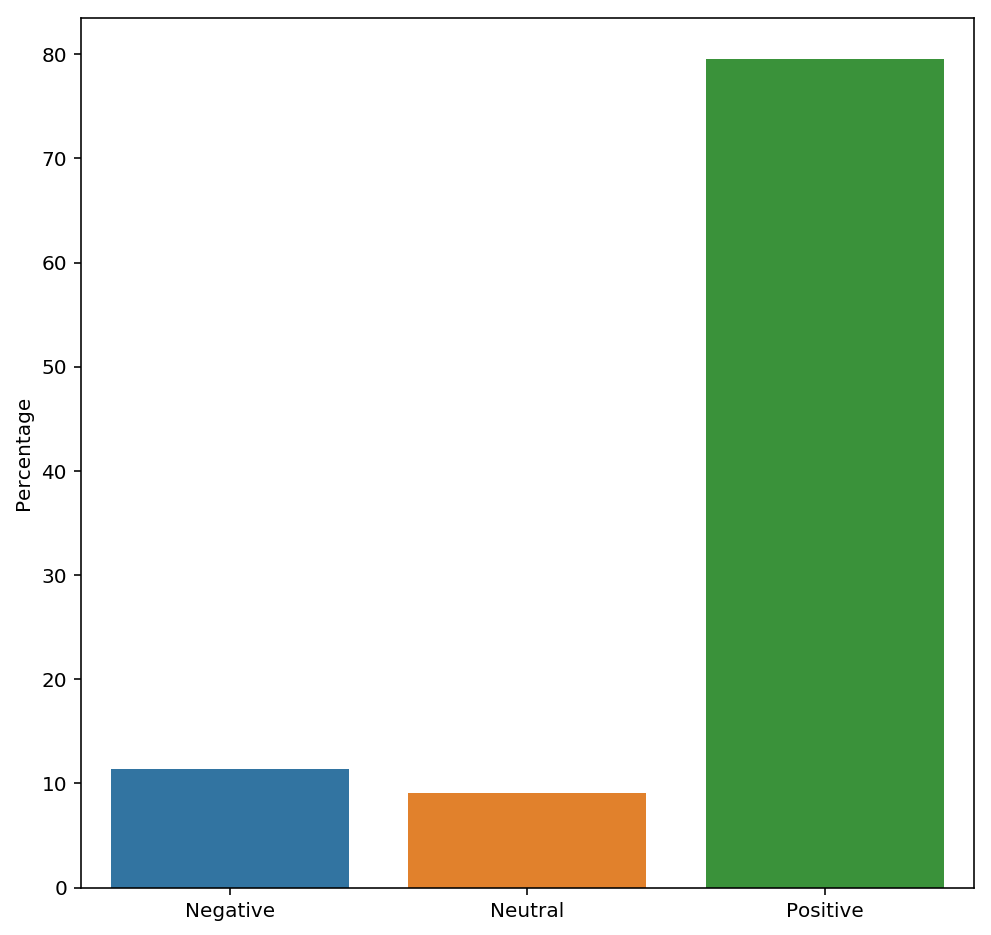

In [14]:
#Visualise our data:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [16]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
review_example=review_dataset['review'].head(5)[0]
print(word_tokenize(review_example, language='english'))

['Terrible', '.', 'Dry', 'corn', 'bread', '.', 'Rib', 'tips', 'were', 'all', 'fat', 'and', 'mushy', 'and', 'had', 'no', 'flavor', '.', 'If', 'you', 'want', 'bbq', 'in', 'this', 'neighborhood', 'go', 'to', 'john', 'mulls', 'roadkill', 'grill', '.', 'Trust', 'me', '.']


In [17]:
#Remove punctuation
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(review_example)

['Terrible',
 'Dry',
 'corn',
 'bread',
 'Rib',
 'tips',
 'were',
 'all',
 'fat',
 'and',
 'mushy',
 'and',
 'had',
 'no',
 'flavor',
 'If',
 'you',
 'want',
 'bbq',
 'in',
 'this',
 'neighborhood',
 'go',
 'to',
 'john',
 'mulls',
 'roadkill',
 'grill',
 'Trust',
 'me']

In [19]:
#In the above tokens there are a lot of irrelevant words (stopwords) like ’the, ’is’, ’and’, ’what’, etc. 
#Those are irrelevant to text sentiment, as they don't provide any valuable information. 
stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [20]:
#Create a function that reads in reviews and removes stopwords:
def process_text(reviews):
    tokens = []
    for line in reviews:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [21]:
#Tops positive words in the positive set
pos_lines = list(df[df.label == 1].review)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('food', 209570),
 ('good', 192983),
 ('great', 155428),
 ('place', 148554),
 ('service', 122708),
 ('like', 105623),
 ('one', 91363),
 ('time', 90233),
 ('get', 81699),
 ('really', 81585),
 ('back', 81331),
 ('would', 80747),
 ('vegas', 79523),
 ('ordered', 75132),
 ('go', 74650),
 ('us', 73865),
 ('burger', 70308),
 ('also', 65681),
 ('chicken', 64385),
 ('menu', 62841)]

In [23]:
#Examine negative words
neg_lines = list(df[df.label == -1].review)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('food', 33578),
 ('service', 19742),
 ('place', 17393),
 ('us', 15776),
 ('get', 14144),
 ('one', 13566),
 ('back', 13303),
 ('time', 12941),
 ('good', 12799),
 ('like', 12329),
 ('would', 12054),
 ('order', 11892),
 ('ordered', 11171),
 ('even', 10993),
 ('go', 10864),
 ('came', 10701),
 ('got', 10326),
 ('minutes', 9662),
 ('never', 9634),
 ('bad', 8412)]

In [42]:
grpd = df.groupby(['business_id','label']).size().reset_index(name='size')
grpd

,business_id,label,size
0,-1m9o3vGRA8IBPNvNqKLmA,-1,1
1,-1m9o3vGRA8IBPNvNqKLmA,0,6
2,-1m9o3vGRA8IBPNvNqKLmA,1,160
3,-3zffZUHoY8bQjGfPSoBKQ,-1,44
4,-3zffZUHoY8bQjGfPSoBKQ,0,38
5,-3zffZUHoY8bQjGfPSoBKQ,1,534
6,-CQokjildrY7UZezXCdEBw,-1,1
7,-CQokjildrY7UZezXCdEBw,0,1
8,-CQokjildrY7UZezXCdEBw,1,39
9,-JfncbVURtvuzBbof40o1w,-1,31


In [5]:
grpd.to_csv('datasets/american_reviews_sentiment.csv', mode='a', encoding='utf-8', index=False)

NameError: name 'grpd' is not defined